<a href="https://colab.research.google.com/github/NimraMushtaq/ml-projects/blob/master/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# Load dataset from MNIST library
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalizhttps://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npze(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
# # Define Model
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
# model.add(tf.keras.layers.Dense(128, activation='relu'))
# model.add(tf.keras.layers.Dense(10, activation='softmax'))

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.fit(x_train, y_train, epochs=5)

# model.save('mnist_digit_classifier.keras')

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8593 - loss: 0.5203
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9549 - loss: 0.1504
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9702 - loss: 0.0988
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9788 - loss: 0.0725
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9844 - loss: 0.0540


In [17]:
# Loading saved model
model = tf.keras.models.load_model('mnist_digit_classifier.keras')
loss, accuracy = model.evaluate(x_test,y_test)

print("Loss: ",loss)
print("Accuracy: ", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9703 - loss: 0.0997
Loss:  0.09076335281133652
Accuracy:  0.9732000231742859


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
This digit is probably a 4


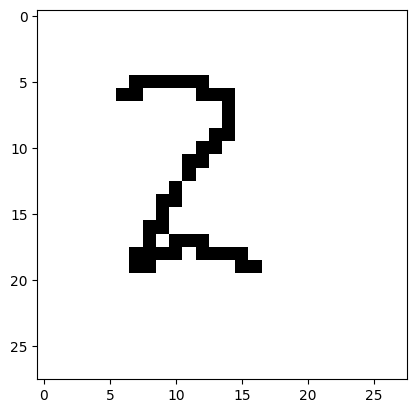

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
This digit is probably a 3


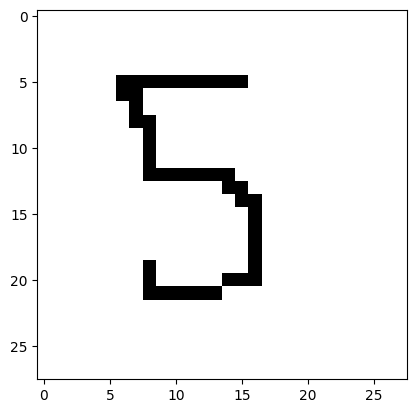

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
This digit is probably a 8


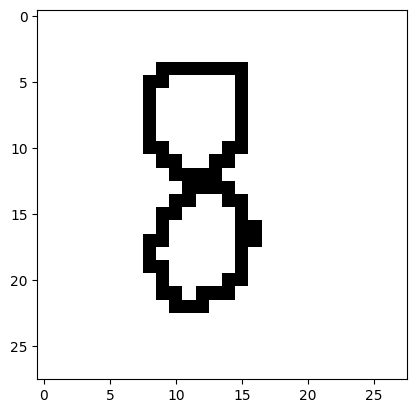

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
This digit is probably a 3


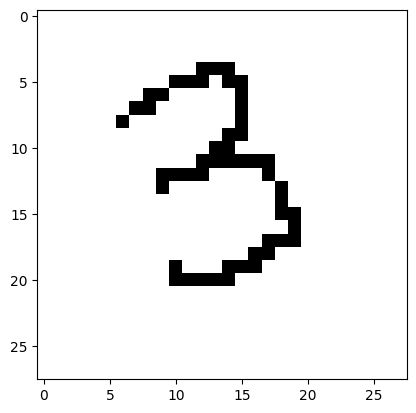

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
This digit is probably a 1


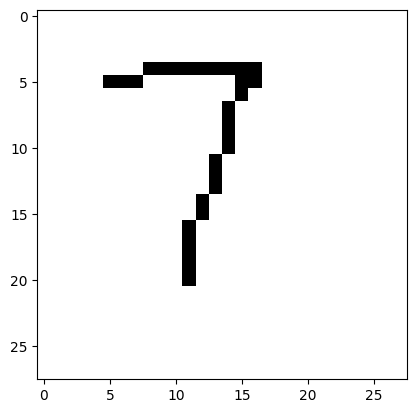

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
This digit is probably a 5


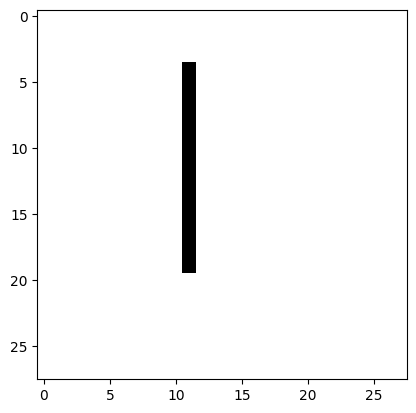

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
This digit is probably a 9


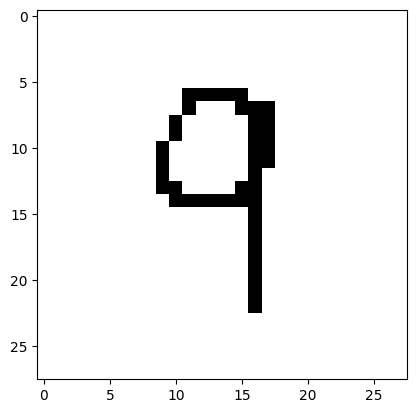

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
This digit is probably a 6


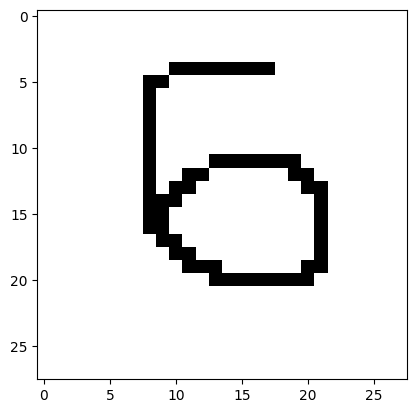

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
This digit is probably a 9


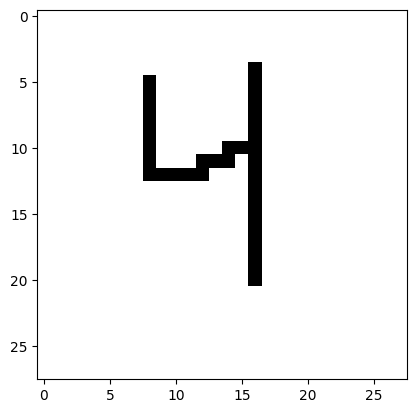

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
This digit is probably a 3


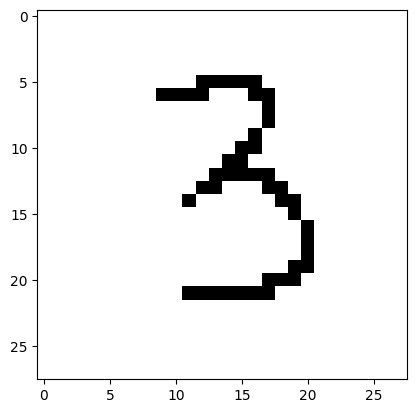

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
This digit is probably a 6


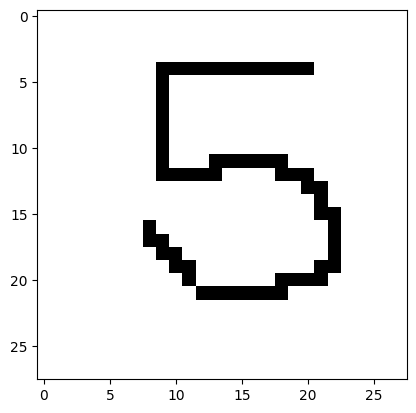

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
This digit is probably a 2


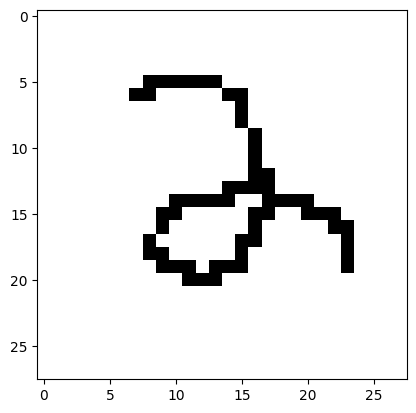

In [18]:
# Testing Model on data
import os
image_number = 1
while os.path.isfile(f'digits/digit{image_number}.png'):
  try:
    img = cv2.imread(f'digits/digit{image_number}.png')[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    # argmax outputs the neuron with highest probability of being correct
    print(f"This digit is probably a {np.argmax(prediction)}")
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()
  except:
    print("Error")
  finally:
    image_number += 1